# Setup Environment 

In [21]:
# pip install tensorflow

In [22]:
# pip install keras

In [23]:
# pip install opencv-python

In [24]:
# pip install imutils

In [25]:
# pip install matplotlib

In [26]:
# pip install seaborn

In [27]:
# pip install scikit-learn

# Import Library

In [28]:
# import shutil
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.regularizers import l2
# from tensorflow.keras import regularizers
# from matplotlib.image import imread
# import matplotlib.image as plt_image
# from sklearn.metrics import confusion_matrix, classification_report
import os
import cv2
import math
import random
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import metrics
from keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.preprocessing import label_binarize
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.utils.class_weight import compute_sample_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Data Visualization

In [29]:
import os
from sklearn.model_selection import train_test_split

# Path ke direktori utama yang berisi sub-direktori untuk masing-masing kelas
main_data_dir = '../data/data_preprocessing/v0.8/augmented'

# Mendefinisikan list untuk data dan label
X, y = [], []

# Loop melalui masing-masing kelas (diasumsikan ada 20 kelas)
for class_name in os.listdir(main_data_dir):
    class_path = os.path.join(main_data_dir, class_name)
    
    # Mendapatkan list file untuk kelas tertentu
    files = os.listdir(class_path)
    
    # Menambahkan path file dan label ke dalam list X dan y
    X.extend([os.path.join(class_path, file) for file in files])
    y.extend([class_name] * len(files))

# Melakukan pembagian data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Verifikasi output
print("Jumlah data pelatihan (X_train):", len(X_train))
print("Jumlah data pengujian (X_test):", len(X_test))

Jumlah data pelatihan (X_train): 6902
Jumlah data pengujian (X_test): 2958


In [30]:
# Tentukan konstanta
image_size = (64, 64)
batch_size = 64
num_classes = 20

# Class = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 
        #  'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

# train_dir = "../data/data_preprocessing/v0.7/data_split_a1/train/"
# test_dir = "../data/data_preprocessing/v0.7/data_split_a1/test/"

In [31]:
# import os

# # Menghitung jumlah gambar per kelas
# file_list = os.listdir(train_dir)

# jumlah_gambar_per_kelas = []

# for kelas in file_list:
#     kelas_path = os.path.join(train_dir, kelas)
#     jumlah_gambar = len(os.listdir(kelas_path))
#     jumlah_gambar_per_kelas.append(jumlah_gambar)

# # Mengecek apakah jumlah data per kelas sudah seimbang
# balanced = all(jumlah == jumlah_gambar_per_kelas[0] for jumlah in jumlah_gambar_per_kelas)

# # Menampilkan pesan sesuai dengan hasil pemeriksaan
# if balanced:
#     print("Balanced Data !")
# else:
#     print("Imbalanced Data !!!\n")
#     # Jika imbalanced, tampilkan jumlah data per kelas
#     for kelas, jumlah in zip(file_list, jumlah_gambar_per_kelas):
#         print(f'Aksara {kelas} jumlah: {jumlah}')

In [32]:
# import cv2
# import matplotlib.pyplot as plt
# import random

# class ImageProcessor:
#     def __init__(self, dataset_path):
#         self.dataset_path = dataset_path

#     def display_random_image(self):
#         # Inisialisasi plot
#         fig, axes = plt.subplots(4, 5, figsize=(20, 20))

#         # Iterasi melalui setiap subfolder
#         for i, folder_name in enumerate(os.listdir(self.dataset_path)):
#             folder_path = os.path.join(self.dataset_path, folder_name)

#             # Pastikan yang diakses adalah subfolder
#             if os.path.isdir(folder_path):

#                 # Mengambil satu gambar acak dari subfolder
#                 image_names = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
#                 random_image_name = random.choice(image_names)
#                 random_image_path = os.path.join(folder_path, random_image_name)

#                 # Membaca dan menampilkan gambar menggunakan Matplotlib
#                 random_image = cv2.imread(random_image_path, cv2.IMREAD_GRAYSCALE)
#                 axes[i % 4, i // 4].imshow(random_image, cmap='gray')
#                 axes[i % 4, i // 4].set_title(f"Class: {folder_name}", fontsize=25)
#                 axes[i % 4, i // 4].axis('on')
                
#         # Menambahkan Title Class Visualization 
#         plt.suptitle("Laplacian of Gaussian (LoG) Filtered in Images", fontsize=30)

#         # Menampilkan plot
#         plt.tight_layout()
#         plt.show()

# dataset_path = train_dir

# # Inisialisasi objek ImageProcessor dan panggil metode display_random_image
# processor = ImageProcessor(dataset_path)
# processor.display_random_image()

In [33]:
# def count_files(dir):
#     arr = []
#     for root, dirs, files in os.walk(dir):
#         count = 0
#         for name in files:
#             if name.endswith(".png"):
#               count = count + 1
#         if count > 0:
#           arr.append(count)
#     return arr

# def get_all_char_names(dir):
#     arr = []
#     for root, dirs, files in os.walk(dir):
#         # print(dirs)
#         arr.append(dirs)
#         break
#     return arr


In [34]:
# # Training Class
# image_count = count_files(train_dir)
# print(len(image_count))
# chars = get_all_char_names(train_dir)
# print(chars)

# fig = plt.figure()
# ax = fig.add_axes([0,0,2,1])
# ax.bar(chars[0], image_count)
# plt.title("Training class distribution")
# plt.show()

# # Testing Class
# image_count = count_files(test_dir)
# print(len(image_count))
# chars = get_all_char_names(test_dir)
# print(chars)

# fig = plt.figure()
# ax = fig.add_axes([0,0,2,1])
# ax.bar(chars[0], image_count)
# plt.title("Testing class distribution")
# plt.show()

# Build the Model

### Image Data Generator

In [35]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Membuat DataFrame untuk train dan test set
train_df = pd.DataFrame({'filename': X_train, 'class': y_train})
test_df = pd.DataFrame({'filename': X_test, 'class': y_test})

# Inisialisasi generator data untuk data pelatihan dan testing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Membuat generator menggunakan flow_from_dataframe
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='class',
    target_size=image_size,  # Ganti dengan ukuran gambar yang sesuai
    batch_size=batch_size,  # Ganti dengan ukuran batch yang sesuai
    class_mode='categorical',  # Jika Anda memiliki lebih dari 2 kelas, gunakan 'categorical'
    color_mode='grayscale'  # Mode warna grayscale
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='class',
    target_size=image_size,  # Ganti dengan ukuran gambar yang sesuai
    batch_size=batch_size,  # Ganti dengan ukuran batch yang sesuai
    class_mode='categorical',  # Jika Anda memiliki lebih dari 2 kelas, gunakan 'categorical'
    color_mode='grayscale'  # Mode warna grayscale
)

Found 6902 validated image filenames belonging to 20 classes.
Found 2958 validated image filenames belonging to 20 classes.


In [36]:
# from sklearn.utils.class_weight import compute_sample_weight

# # Mencari class weights untuk mengatasi ketidakseimbangan kelas
# class_weights = compute_sample_weight('balanced', train_generator.classes)
# class_weight = dict(enumerate(class_weights))

### Model - CNN + VGG

In [37]:
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam

# def build_vgg16(input_shape=(128, 128, 1), num_classes=num_classes):
#     inputs = Input(shape=input_shape)

#     # Blok 1
#     conv1_1 = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
#     batchnorm1_1 = BatchNormalization()(conv1_1)
#     conv1_2 = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(batchnorm1_1)
#     batchnorm1_2 = BatchNormalization()(conv1_2)
#     maxpool1 = MaxPooling2D((2, 2), strides=(2, 2))(batchnorm1_2)

#     # Blok 2
#     conv2_1 = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(maxpool1)
#     batchnorm2_1 = BatchNormalization()(conv2_1)
#     conv2_2 = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(batchnorm2_1)
#     batchnorm2_2 = BatchNormalization()(conv2_2)
#     maxpool2 = MaxPooling2D((2, 2), strides=(2, 2))(batchnorm2_2)

#     # Blok 3
#     conv3_1 = Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu')(maxpool2)
#     batchnorm3_1 = BatchNormalization()(conv3_1)
#     conv3_2 = Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu')(batchnorm3_1)
#     batchnorm3_2 = BatchNormalization()(conv3_2)
#     conv3_3 = Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu')(batchnorm3_2)
#     batchnorm3_3 = BatchNormalization()(conv3_3)
#     maxpool3 = MaxPooling2D((2, 2), strides=(2, 2))(batchnorm3_3)

#     # Blok 4
#     conv4_1 = Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu')(maxpool3)
#     batchnorm4_1 = BatchNormalization()(conv4_1)
#     conv4_2 = Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu')(batchnorm4_1)
#     batchnorm4_2 = BatchNormalization()(conv4_2)
#     conv4_3 = Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu')(batchnorm4_2)
#     batchnorm4_3 = BatchNormalization()(conv4_3)
#     maxpool4 = MaxPooling2D((2, 2), strides=(2, 2))(batchnorm4_3)

#     # Blok 5
#     conv5_1 = Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu')(maxpool4)
#     batchnorm5_1 = BatchNormalization()(conv5_1)
#     conv5_2 = Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu')(batchnorm5_1)
#     batchnorm5_2 = BatchNormalization()(conv5_2)
#     conv5_3 = Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu')(batchnorm5_2)
#     batchnorm5_3 = BatchNormalization()(conv5_3)
#     maxpool5 = MaxPooling2D((2, 2), strides=(2, 2))(batchnorm5_3)

#     # Fully connected layers
#     flatten = Flatten(name='flatten')(maxpool5)

#     dense1 = Dense(256, activation='relu')(flatten)
#     batchnorm_dense1 = BatchNormalization()(dense1)
#     dropout1 = Dropout(0.75)(batchnorm_dense1)

#     dense2 = Dense(128, activation='relu')(dropout1)
#     batchnorm_dense2 = BatchNormalization()(dense2)
#     dropout2 = Dropout(0.75)(batchnorm_dense2)

#     outputs = Dense(num_classes, activation='softmax')(dropout2)

#     model = Model(inputs=inputs, outputs=outputs)

#     return model

# # Create the VGG16 model
# model = build_vgg16()

# # Adam optimizer with learning rate scheduling, Weight Decay, and Gradient Clipping
# opt = Adam(learning_rate=0.0001, 
#            weight_decay=1e-4, 
#            clipvalue=0.5
#            )
    
# # Compile the model
# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# model.summary()

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def build_vgg16(input_shape=(64, 64, 1), num_classes=num_classes):
    model = Sequential()

    # Blok 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Dropout(0.75))

    # Blok 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Dropout(0.75))

    # Blok 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Dropout(0.75))

    # Blok 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Dropout(0.75))
    
    # Blok 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Dropout(0.75))
    
    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.75))
    
    # model.add(Dense(256, activation='relu'))
    # model.add(BatchNormalization())
    # model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Create the VGG16 model
model = build_vgg16()

# # Adam optimizer with learning rate scheduling, Weight Decay, and Gradient Clipping
opt = Adam(learning_rate=0.0001, weight_decay=1e-4, clipvalue=0.1)
    
# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 64, 64, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 15,261,140 (58.22 MB)

 Trainable params: 15,252,180 (58.18 MB)

 Non-trainable params: 8,960 (35.00 KB)

### Training Model

In [39]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Fungsi untuk menetapkan learning rate secara dinamis
# def lr_scheduler(epoch, lr):
#     if epoch % 50 == 0 and epoch > 0:
#         lr = lr * 0.9  # Mengurangi learning rate setiap 50 epoch
#     return lr

# lr_schedule = LearningRateScheduler(lr_scheduler)

# Define the filepath where you want to save the model
checkpoint_filepath = "../save_models/aksarajawa_v0.4.keras"

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='max')

callbacks_list = [checkpoint]

In [40]:
# Melakukan pelatihan model
history = model.fit(
    train_generator,
    batch_size=batch_size,
    epochs=10,
    validation_data=test_generator)
    # steps_per_epoch=len(train_generator),
    # validation_steps=len(test_generator))
    # callbacks=callbacks_list,  # Uncomment jika Anda memiliki callbacks
    # class_weight=class_weight, # Uncomment jika Anda memiliki class weight

Epoch 1/10


c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 1343s 12s/step - accuracy: 0.0536 - loss: 5.5681 - val_accuracy: 0.0521 - val_loss: 3.5264
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1307s 12s/step - accuracy: 0.0770 - loss: 5.0098 - val_accuracy: 0.0521 - val_loss: 7.2623
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1656s 15s/step - accuracy: 0.1238 - loss: 4.2005 - val_accuracy: 0.0521 - val_loss: 12.8553
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1657s 15s/step - accuracy: 0.2147 - loss: 3.3334 - val_accuracy: 0.0521 - val_loss: 20.7248
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 2316s 21s/step - accuracy: 0.2988 - loss: 2.6682 - val_accuracy: 0.0521 - val_loss: 26.9526
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 2821s 26s/step - accuracy: 0.3916 - loss: 2.1280 - val_accuracy: 0.0521 - val_loss: 29.3216
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 2529s 23s/step - accuracy: 0.4895 - loss: 1.6299 - val_accuracy: 0.0521 - val_loss: 31.1277
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 2498s 23s/step - accuracy: 0.5596 - loss: 1.3440 

### Model Graph

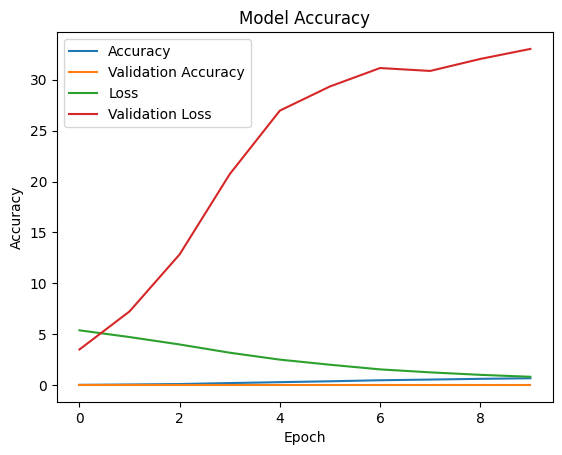

In [48]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])
plt.show()

In [42]:
# acc = history.history['accuracy']
# loss = history.history['loss']
# epochs_range = range(len(acc))

# plt.figure(figsize=(12, 4))

# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.title('Training Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(loc='lower right')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.title('Training Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(loc='upper right')

# plt.tight_layout()
# plt.show()

In [43]:
# import matplotlib.pyplot as plt

# def plot_training_history(history):
#     # Mengambil data loss dan akurasi dari history
#     loss = history.history['loss']
#     val_loss = history.history['val_loss']
#     accuracy = history.history['accuracy']
#     val_accuracy = history.history['val_accuracy']

#     # Menampilkan grafik loss
#     plt.figure(figsize=(10, 5))
#     plt.plot(loss, label='Training Loss')
#     plt.plot(val_loss, label='Validation Loss')
#     plt.title('Training and Validation Loss')
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.show()

#     # Menampilkan grafik akurasi
#     plt.figure(figsize=(10, 5))
#     plt.plot(accuracy, label='Training Accuracy')
#     plt.plot(val_accuracy, label='Validation Accuracy')
#     plt.title('Training and Validation Accuracy')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.legend()
#     plt.show()

# # Panggil fungsi plot_training_history dengan history dari pelatihan model
# plot_training_history(history)

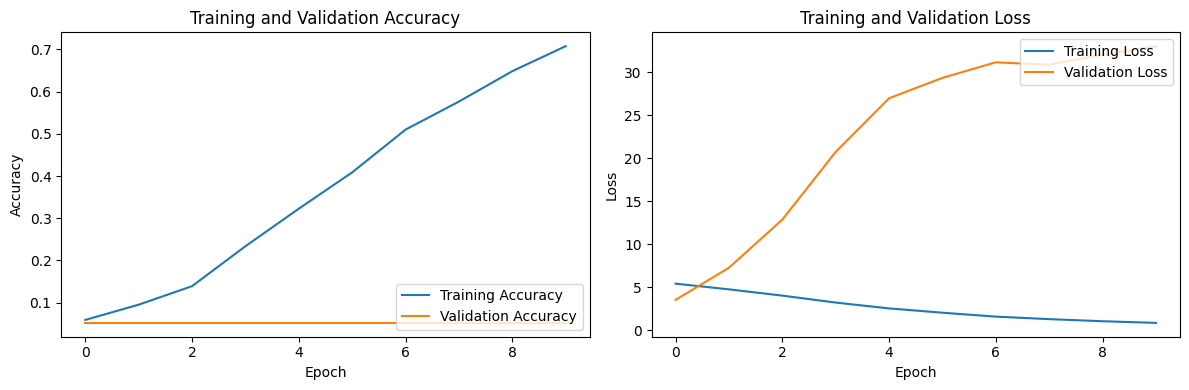

In [49]:
# Menampilkan grafik training dan validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Try Predict

In [50]:
from tensorflow.keras.models import load_model

# Saved Model
saved_model_path = checkpoint_filepath
model.save(saved_model_path)

# Memuat model dari file yang disimpan
loaded_model = load_model(saved_model_path)

# Evaluasi model menggunakan data uji
loss, accuracy = loaded_model.evaluate(test_generator)

# Print hasil evaluasi
print("Loss:", loss)
print("Accuracy:", accuracy)


47/47 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.0501 - loss: 32.8923
Loss: 33.00238800048828
Accuracy: 0.05206220597028732


In [46]:
# Import the necessary modules
from sklearn import metrics
import math

test_steps_per_epoch = math.ceil(test_generator.samples / test_generator.batch_size)
predictions = model.predict(test_generator, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Hitung dan tampilkan classification report
report = metrics.classification_report(true_classes,
                                       predicted_classes,
                                       target_names = class_labels)
print(report)

47/47 ━━━━━━━━━━━━━━━━━━━━ 245s 5s/step
              precision    recall  f1-score   support

          ba       0.00      0.00      0.00       136
          ca       0.00      0.00      0.00       153
          da       0.00      0.00      0.00       131
         dha       0.00      0.00      0.00       148
          ga       0.00      0.00      0.00       169
          ha       0.00      0.00      0.00       132
          ja       0.00      0.00      0.00       150
          ka       0.00      0.00      0.00       152
          la       0.00      0.00      0.00       169
          ma       0.00      0.00      0.00       137
          na       0.00      0.00      0.00       151
         nga       0.00      0.00      0.00       138
         nya       0.00      0.00      0.00       148
          pa       0.00      0.00      0.00       140
          ra       0.05      1.00      0.10       154
          sa       0.00      0.00      0.00       142
          ta       0.00      0.00      0.

c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [47]:
import pandas as pd
import seaborn as sn

# Buat DataFrame untuk confusion matrix
df_cm = pd.DataFrame(confusion_matrix,
                     index=[i for i in ("ba", "ca", "da", "dha", "ga", "ha", "ja", "ka", "la", "ma",
                                        "na", "nga", "nya", "pa", "ra", "sa", "ta", "tha", "wa", "ya")],

                     columns=[i for i in ("ba", "ca", "da", "dha", "ga", "ha", "ja", "ka", "la", "ma",
                                          "na", "nga", "nya", "pa", "ra", "sa", "ta", "tha", "wa", "ya")])
# Tampilkan heatmap
plt.figure(figsize=(15, 15))
sn.heatmap(df_cm, annot=True)

NameError: name 'confusion_matrix' is not defined

In [ ]:
# from sklearn.preprocessing import label_binarize
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# import numpy as np


# # Make predictions
# pred = model.predict(test_generator)

# # Extract true labels from generator
# true_labels = true_classes  

# # One-hot encode true labels
# true_labels_one_hot = label_binarize(true_labels, classes=np.arange(num_classes))

# # Compute ROC curve and ROC AUC for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(num_classes):
#     fpr[i], tpr[i], _ = roc_curve(true_labels_one_hot[:, i], pred[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC AUC score
# fpr["micro"], tpr["micro"], _ = roc_curve(true_labels_one_hot.ravel(), pred.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# colors = ['cornflowerblue', 'darkorange', 'forestgreen', 'red', 'purple', 'gray', 'black', 'pink',
#           'cyan', 'magenta', 'yellow', 'orange', 'lime', 'blue', 'green', 'brown', 'indigo', 'violet', 'olive', 'teal']

# # Plot the ROC curves for each class and the micro-average ROC curve
# plt.figure(figsize=(8, 6))
# lw = 2

# plt.plot(fpr["micro"], tpr["micro"], lw=lw, label='micro-average ROC curve (AUC = {0:0.2f})'
#                                                    ''.format(roc_auc["micro"]))

# for i, color in zip(range(num_classes), colors):  
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))
    
# plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate', fontsize=14)
# plt.ylabel('True Positive Rate', fontsize=14)
# plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
# plt.legend(loc="lower right", fontsize=12)
# plt.show()

# Try Test

In [ ]:
# from keras.preprocessing import image
# import numpy as np

# # Muat model kembali dari variabel
# loaded_model = load_model(saved_model_path)

# # Load the grayscale image
# # test_image_path1 = '../data/data_original/javaneseScript_byPhiard/prediction/ba17.png'
# test_image_path1 = '../data/data_preprocessing/v0.3/data_split/test/ba/grayscale_ba116.pred3.b_aug_0_80.png'
# img = image.load_img(test_image_path1, color_mode='grayscale', target_size=(128, 128))

# # Convert the image to array
# img_array = image.img_to_array(img)

# # Expand the dimensions to match the input shape of the model
# img_array = np.expand_dims(img_array, axis=0)

# # Perform the prediction
# predictions = model.predict(img_array)

# # Get the predicted class index
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Muat model kembali dari variabel
# loaded_model = load_model(saved_model_path)

# # Menguji Model
# test_image_path1 = '../data/data_original/javaneseScript_byPhiard/prediction/ba17.png'
# img = image.load_img(test_image_path1, target_size=(64, 64))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path1)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# # predictions = loaded_model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Menguji Model
# test_image_path2 = '../data/databyPhiard_original/prediction/ba49.mine2.png'
# img = image.load_img(test_image_path2, target_size=(150, 150))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path2)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Menguji Model
# test_image_path3 = '../data/databyPhiard_original/prediction/ca2.png'
# img = image.load_img(test_image_path3, target_size=(150, 150))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path3)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Menguji Model
# test_image_path4 = '../data/databyPhiard_original/prediction/da5.png'
# img = image.load_img(test_image_path4, target_size=(150, 150))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path4)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Menguji Model
# test_image_path5 = '../data/databyPhiard_original/prediction/dha11.png'
# img = image.load_img(test_image_path5, target_size=(150, 150))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path5)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Menguji Model
# test_image_path6 = '../data/databyPhiard_original/prediction/ga16.png'
# img = image.load_img(test_image_path6, target_size=(150, 150))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path6)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Menguji Model
# test_image_path7 = '../data/databyPhiard_original/prediction/ha0.png'
# img = image.load_img(test_image_path7, target_size=(150, 150))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path7)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Menguji Model
# test_image_path8 = '../data/databyPhiard_original/prediction/ja12.png'
# img = image.load_img(test_image_path8, target_size=(150, 150))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path8)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Menguji Model
# test_image_path9 = '../data/databyPhiard_original/prediction/ka4.png'
# img = image.load_img(test_image_path9, target_size=(150, 150))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path9)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Menguji Model
# test_image_path10 = '../data/databyPhiard_original/prediction/la9.png'
# img = image.load_img(test_image_path10, target_size=(150, 150))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path10)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Menguji Model
# test_image_path11 = '../data/databyPhiard_original/prediction/ma.0.jpg'
# img = image.load_img(test_image_path11, target_size=(150, 150))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path11)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Menguji Model
# test_image_path12 = '../data/databyPhiard_original/prediction/ma.1.jpg'
# img = image.load_img(test_image_path12, target_size=(150, 150))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path12)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Menguji Model
# test_image_path13 = '../data/databyPhiard_original/prediction/ma15.png'
# img = image.load_img(test_image_path13, target_size=(150, 150))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path13)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Menguji Model
# test_image_path14 = '../data/databyPhiard_original/prediction/na1.png'
# img = image.load_img(test_image_path14, target_size=(150, 150))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path14)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Menguji Model
# test_image_path15 = '../data/databyPhiard_original/prediction/nga19.png'
# img = image.load_img(test_image_path15, target_size=(150, 150))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path15)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Menguji Model
# test_image_path16 = '../data/databyPhiard_original/prediction/nga220.pred.png'
# img = image.load_img(test_image_path16, target_size=(150, 150))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path16)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Menguji Model
# test_image_path17 = '../data/databyPhiard_original/prediction/nya14.png'
# img = image.load_img(test_image_path17, target_size=(150, 150))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path17)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Menguji Model
# test_image_path18 = '../data/databyPhiard_original/prediction/pa10.png'
# img = image.load_img(test_image_path18, target_size=(150, 150))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path18)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Menguji Model
# test_image_path19 = '../data/databyPhiard_original/prediction/ra164.pred.png'
# img = image.load_img(test_image_path19, target_size=(150, 150))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path19)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Menguji Model
# test_image_path20 = '../data/databyPhiard_original/prediction/ra3.png'
# img = image.load_img(test_image_path20, target_size=(150, 150))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path20)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Menguji Model
# test_image_path21 = '../data/databyPhiard_original/prediction/sa7.png'
# img = image.load_img(test_image_path21, target_size=(150, 150))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path21)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Menguji Model
# test_image_path22 = '../data/databyPhiard_original/prediction/ta6.png'
# img = image.load_img(test_image_path22, target_size=(150, 150))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path22)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Menguji Model
# test_image_path23 = '../data/databyPhiard_original/prediction/tha18.png'
# img = image.load_img(test_image_path23, target_size=(150, 150))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path23)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Menguji Model
# test_image_path24 = '../data/databyPhiard_original/prediction/wa8.png'
# img = image.load_img(test_image_path24, target_size=(150, 150))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path24)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Menguji Model
# test_image_path25 = '../data/databyPhiard_original/prediction/ya13.png'
# img = image.load_img(test_image_path25, target_size=(150, 150))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path25)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Menguji Model
# test_image_path26 = '../data/databyPhiard_original/prediction/nya_01.png'
# img = image.load_img(test_image_path26, target_size=(150, 150))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path26)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Menguji Model
# test_image_path26 = '../data/databyPhiard_original/prediction/sa_01.png'
# img = image.load_img(test_image_path26, target_size=(150, 150))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path26)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)

In [ ]:
# # Menguji Model
# test_image_path26 = '../data/databyPhiard_original/prediction/ha201.png'
# img = image.load_img(test_image_path26, target_size=(150, 150))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# img = imread(test_image_path26)
# plt.imshow(img)

# # Perform the prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_name = class_labels[predicted_class_index]

# # Print the result
# print("Predicted class:", predicted_class_name)